PHASE ONE: DATA PREPARATION

In [1]:
import pandas as pd

#load the data
df = pd.read_csv('data.csv')

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


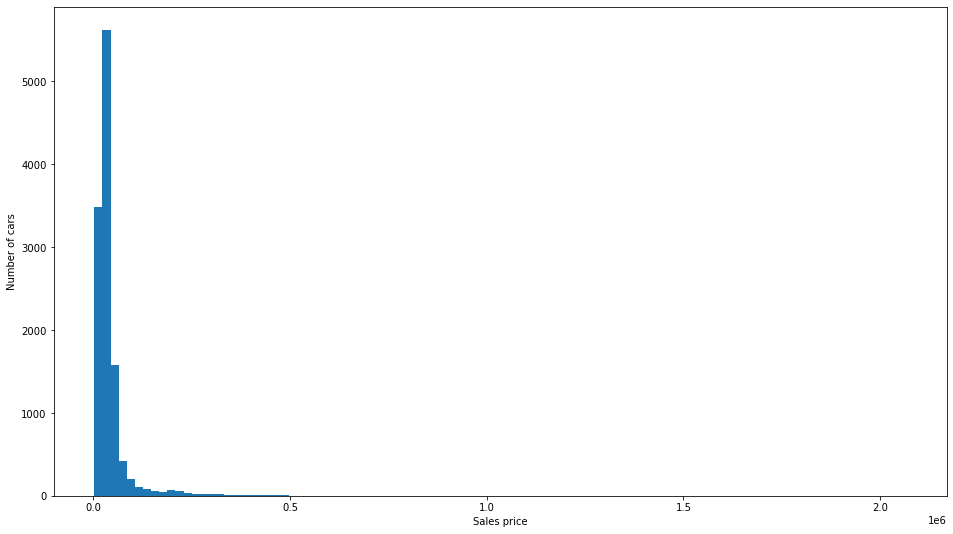

In [2]:
#plotting the distribution curve for our car price(MSRP) - the target variable
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,9))
plt.hist(df.MSRP, bins=100)
plt.ylabel('Number of cars')
plt.xlabel('Sales price')
plt.show()

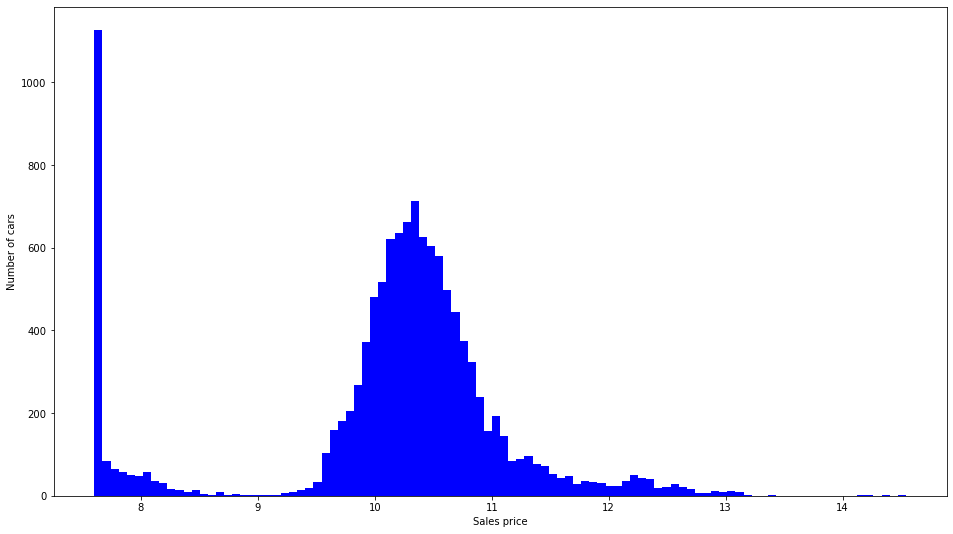

In [3]:
#since our price data is highly skewed, perhaps normalizing the data using log would make the model to be properly trained
import numpy as np
plt.figure(figsize=(16,9))
plt.hist(np.log(df.MSRP), bins=100, color= 'blue')
plt.ylabel('Number of cars')
plt.xlabel('Sales price')
plt.show()

In [4]:
#remove the spaces and format the case of each column
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

VARIABLE TYPES CREATION

In [5]:
cat_var = [var for var in df.columns if df[var].dtype == 'object']
cat_var

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [6]:
#remove the spaces and format the case for the values of each feature column of type object
for col in cat_var:
    try:
        if df[col].dtype == 'object':
            df[col] = df[col].str.lower().str.replace(' ', '_')
        else:
            df[col] = df[col]
    except TypeError:
        print('wrong data type')
       
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [7]:
print(df['number_of_doors'].value_counts())
len(df['number_of_doors'])

4.0    8353
2.0    3160
3.0     395
Name: number_of_doors, dtype: int64


11914

In [8]:
#replace na or nan with 0 in the number_of_doors variable
df['number_of_doors'] = df['number_of_doors'].fillna(0)


#number_of_doors is in actual sense supposed to be a cat var, so we first round the decimal to whole number
for i in df.index:
    df['number_of_doors'] = round(df['number_of_doors'][i])

df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2,luxury,compact,convertible,28,18,3916,34500


In [9]:
#update the data type for number of doors, because in reality it should be a categorical variable and not numerical
df['number_of_doors'] = df['number_of_doors'].astype('object')
df['engine_cylinders'] = df['engine_cylinders'].astype('object')



In [10]:
#add the new categorical variable to the list cat_var
cat_var = cat_var + ['number_of_doors', 'engine_cylinders']
cat_var

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style',
 'number_of_doors',
 'engine_cylinders']

In [11]:
#Temporal variable
year_var = ['year']

In [12]:
num_var = [var for var in df.columns if var not in cat_var and var not in year_var and var != 'msrp']
num_var

['engine_hp', 'highway_mpg', 'city_mpg', 'popularity']

In [13]:
target = ['msrp']

In [14]:
#missing variable creation
var_with_na = [var for var in df.columns if df[var].isnull().sum() > 0]
var_with_na

['engine_fuel_type', 'engine_hp', 'engine_cylinders', 'market_category']

In [15]:
#discovering the percentage of missing values and displaying the results ordered by % of missing dat
100 * df[var_with_na].isnull().mean().sort_values(ascending=False)

market_category     31.408427
engine_hp            0.579151
engine_cylinders     0.251805
engine_fuel_type     0.025180
dtype: float64

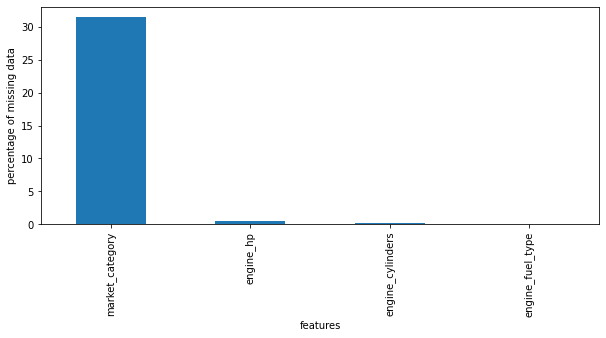

In [16]:
#creating a visual plot of the missing data
import matplotlib.pyplot as plt
(100*df[var_with_na].isnull().mean().sort_values(ascending=False)).plot.bar(figsize=(10,4))
plt.ylabel('percentage of missing data')
plt.xlabel('features')
plt.show()

In [17]:
#uncovering missing variables and segementing them based on categorical or numerical
cat_na = [var for var in cat_var if var in var_with_na]
num_na = [var for var in num_var if var in var_with_na]

print('categorical variable with NA: ',cat_na)
print('numerical variable with NA: ', num_na)

categorical variable with NA:  ['engine_fuel_type', 'market_category', 'engine_cylinders']
numerical variable with NA:  ['engine_hp']


TEMPORAL VARIABLE

Text(0, 0.5, 'Median Car Price')

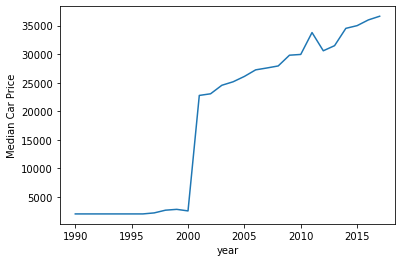

In [18]:
#Examine the relationship between the model year and the MSRP using a line chart
df.groupby('year')['msrp'].median().plot()
plt.ylabel('Median Car Price')

The above plot shows the sharp relationship between the car model year and its price. In other words, as the model year increases the price or value for the car went up

DISCRETE VARIABLES

In [19]:
len(df['year'].unique())

28

In [20]:
#Making a list of discrete variables
discrete_vars = [var for var in num_var if df[var].nunique()<20 and var not in year_var] 
print('number of discrete variables: ', len(discrete_vars))

number of discrete variables:  0


The above shows us that all the numerical variable are continuous in nature, hence we have to explore their distribution instead

array([[<AxesSubplot:title={'center':'engine_hp'}>,
        <AxesSubplot:title={'center':'highway_mpg'}>],
       [<AxesSubplot:title={'center':'city_mpg'}>,
        <AxesSubplot:title={'center':'popularity'}>]], dtype=object)

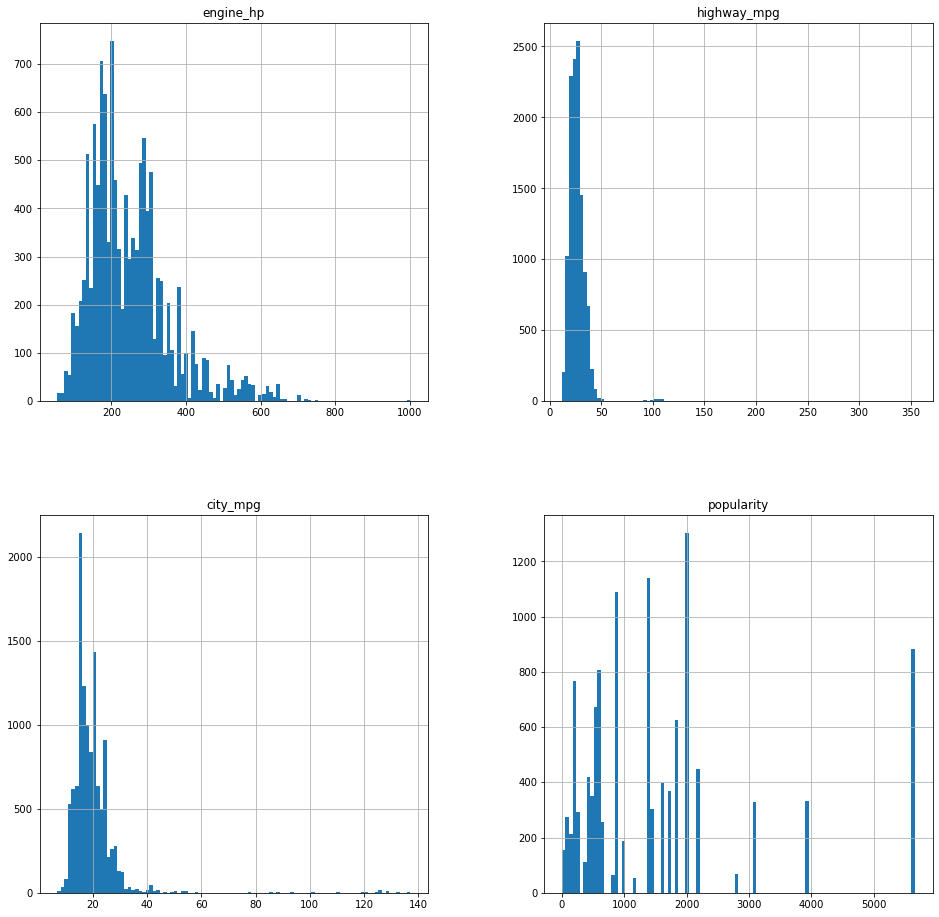

In [21]:
continuous_vars =  [var for var in num_var if var not in discrete_vars]
df[continuous_vars].hist(bins=100, figsize=(16,16))

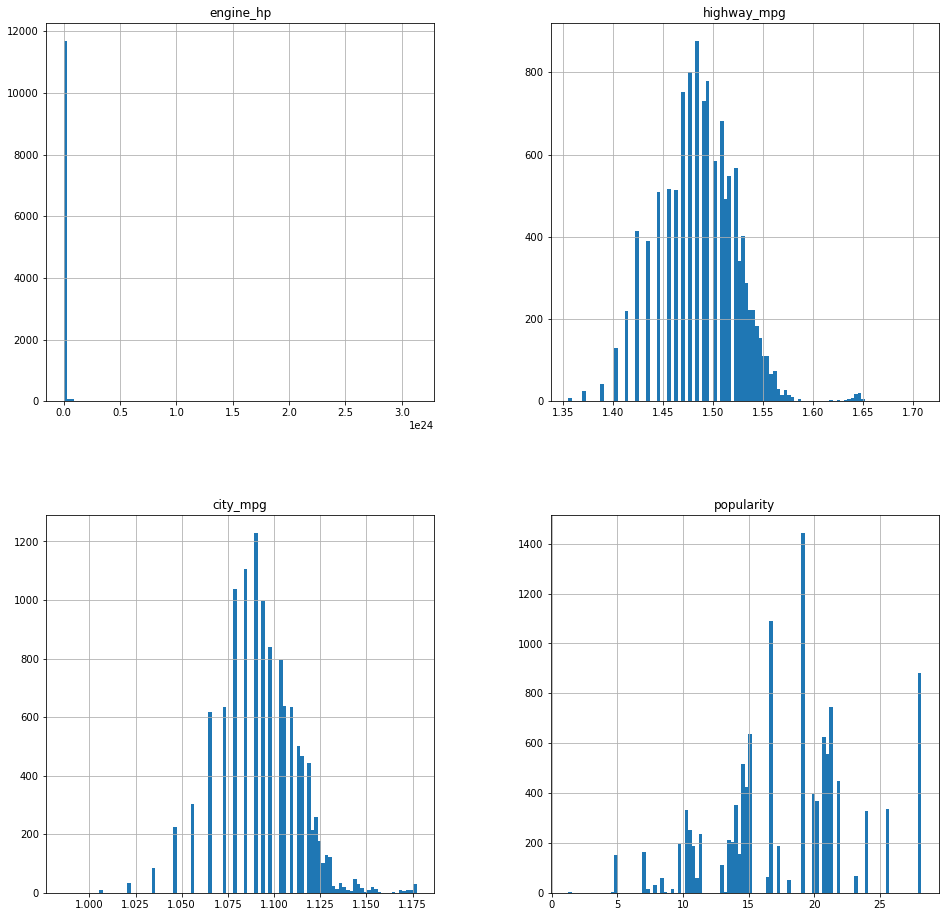

In [22]:
#Using yeo-johnson transformation technique to normalize our highly skewed numerical continuous data
import scipy.stats as stats

#let's create a copy of our dataset
tmp = df.copy()

for var in continuous_vars:
    tmp[var], param = stats.yeojohnson(df[var])

#create a plot of the transformed variables
tmp[continuous_vars].hist(bins=100, figsize=(16,16))
plt.show()


CATEGORICAL VARIABLE

<AxesSubplot:>

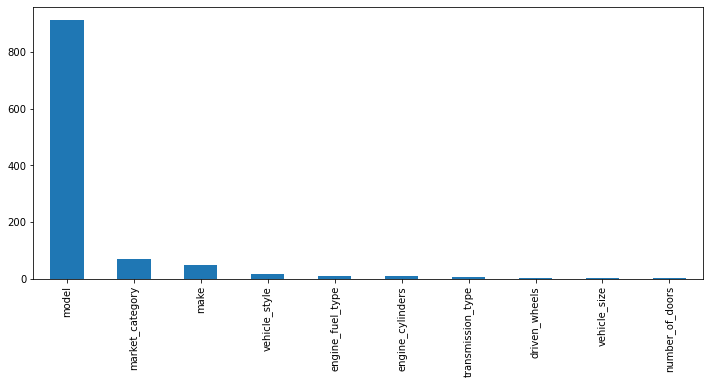

In [23]:
#let's investigate how many labels are prresent in each variable
df[cat_var].nunique().sort_values(ascending=False).plot.bar(figsize=(12,5))

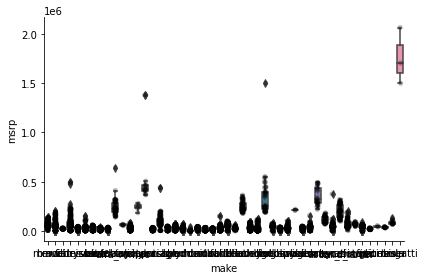

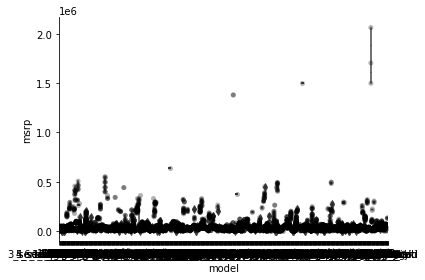

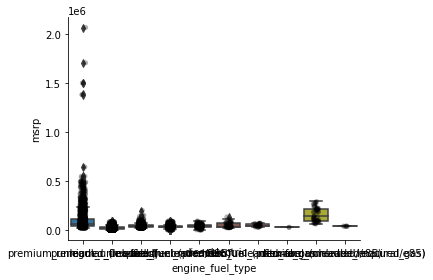

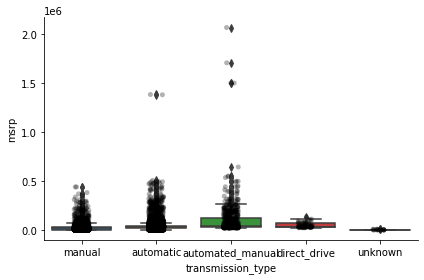

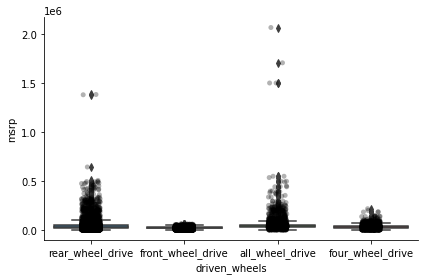

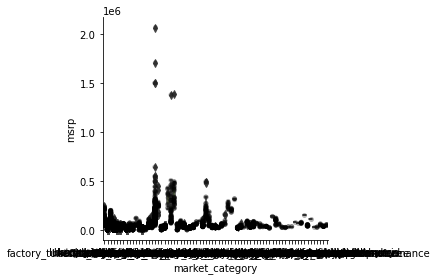

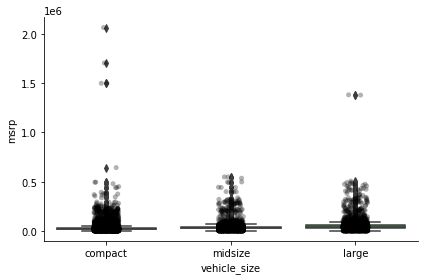

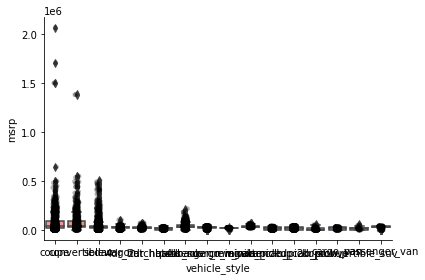

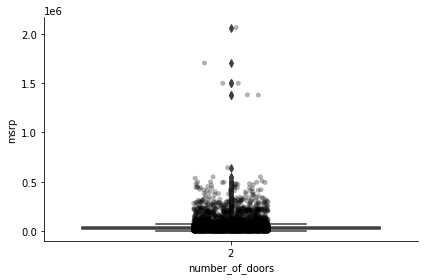

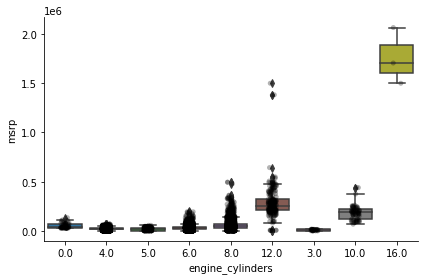

In [24]:
#let's inspect the relationship of these cat variables with respect to the MSRP
for var in cat_var:
    sns.catplot(x=var, y='msrp', data=df, kind='box',height=4, aspect=1.5)
    #add data points tto the boxplot
    sns.stripplot(x=var, y='msrp', data=df, jitter=0.1, color='k', alpha=0.3)
    plt.show()

In [25]:
#Investigating rare labels
def analsye_rare_labels(df,var,rare_perc):
    df = df.copy()

    #determine the percentage of observations per category
    tmp = df.groupby(var)['msrp'].count()/len(df)

    #return categories that are rare
    return tmp[tmp<rare_perc]


for var in cat_var:
    analsye_rare_labels(df, var, 0.01)

It is essential to isolate rare-labels as they usually have the potential to overfit or underfit our ML models